# SVR for ML-based prediction model

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# https://github.com/tomsharp/SVR/blob/master/SVR.ipynb
# https://github.com/amanjayedi/Machine-Learning-with-Python/blob/master/Regression/Support%20Vector%20Regression.ipynb
# https://towardsdatascience.com/unlocking-the-true-power-of-support-vector-regression-847fd123a4a0
# https://medium.datadriveninvestor.com/a-practical-guide-to-getting-started-with-machine-learning-3a6fcc0f95aa
# https://nvsyashwanth.github.io/machinelearningmaster/learning-curves/ (Learning curve)

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/_MIZZOU/_Resources_KIM+AMAN/DEV/2023_DigitalTwin/OverlandP04ForSVR.csv")

In [ ]:
df.head()
#len(df)

,T1_Depth,T2_Depth,T3_Depth,T1_Height_U,T2_Height_U,T3_Height_U,T1_Setback_FU,T2_Setback_FU,T3_Setback_FU,T1_Roof_Height,T2_Roof_Height,T3_Roof_Height,SolarRadiation
0,60,70,50,12,48,12,5,10,5,9,9,12,582.886839
1,70,60,50,12,36,24,10,10,10,9,12,9,655.262018
2,60,60,50,36,12,36,10,5,5,12,12,9,721.048065
3,70,60,60,36,24,12,10,10,10,9,9,9,654.008142
4,60,60,50,24,12,12,10,10,5,12,9,12,640.579075


In [ ]:
# fig,ax = plt.subplots(6,2,figsize=(12,24))
# ax = ax.ravel()
# for i in range(12):
#     ax[i].scatter(df[df.columns[i]],df['SolarRadiation'],color='green',alpha=0.75)
#     ax[i].set_title(f"{df.columns[i]} vs. Solar Radiation",fontsize=14)
#     ax[i].grid(True)
# plt.show()

In [ ]:
#Separate IVs and DVs
X = df[['T1_Depth','T2_Depth','T3_Depth','T1_Height_U','T2_Height_U','T3_Height_U','T1_Setback_FU','T2_Setback_FU','T3_Setback_FU','T1_Roof_Height','T2_Roof_Height','T3_Roof_Height']]
y = df['SolarRadiation']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

## Split data and Random State

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error as mse
import seaborn as sns
plt.style.use('seaborn')

In [ ]:
#Split the data
# X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state = 400)
#X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=42)

In [ ]:
from sklearn.svm import SVR
# Array of random_state values from 0 to 400
random_states = np.arange(start=0, stop=400)

# Initialize a list where we'll store the score of each random_state
scores = []

# Initialize search
for state in random_states:
    X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=state)
    svr_linear = SVR(kernel='linear',gamma='scale', C=1.0, epsilon=0.1)
    svr_linear.fit(X_train,y_train)
    scores.append(svr_linear.score(X_test, y_test))

results = pd.DataFrame({'random_state':random_states, 'score':scores})
RandomState_df = results[results['score'] == results['score'].max()]
RandomState = RandomState_df.iloc[0][0].astype(int)
print("The best Random State Value of this dataset is:", RandomState)

The best Random State Value of this dataset is: 63


## Learning Curve

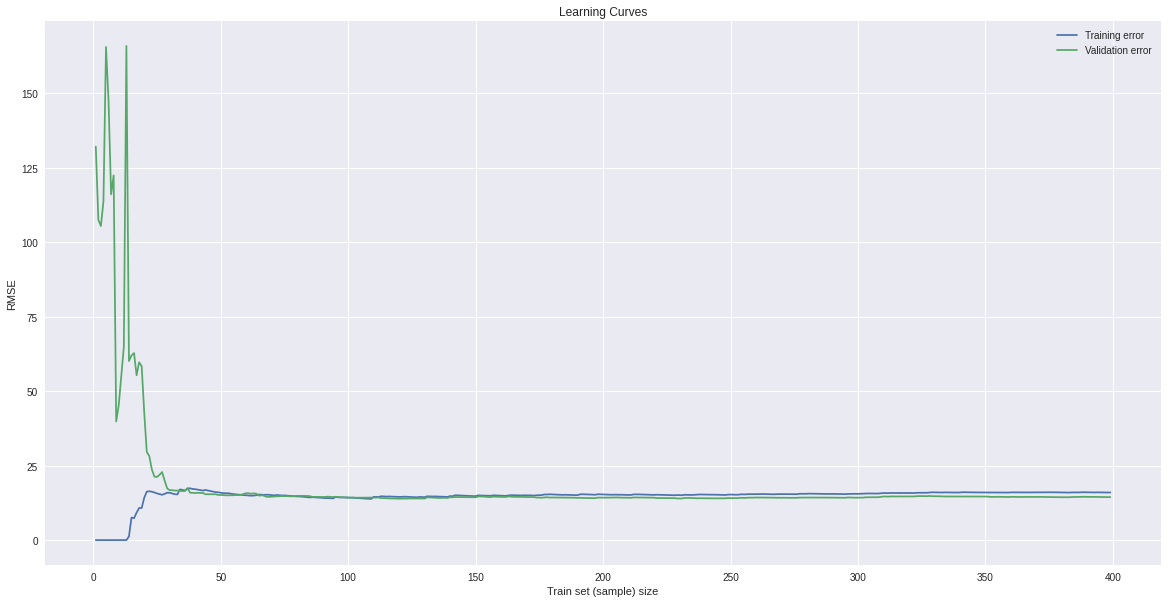

In [ ]:
#Using the random state number for further learning curve and predictions
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.20, random_state=RandomState)

#Learning curve
# https://nvsyashwanth.github.io/machinelearningmaster/learning-curves/
regressor=LinearRegression()
regressor.fit(X_train,y_train)
predictions=regressor.predict(X_test)
plt.figure(1,figsize=(20,10))
train_errors=[]
val_errors=[]
for i in range(1,len(X_train)):
    regressor.fit(X_train[:i],y_train[:i])
    train_preds=regressor.predict(X_train[:i])
    val_preds=regressor.predict(X_test)
    train_errors.append(mse(train_preds,y_train[:i]))
    val_errors.append(mse(val_preds,y_test))
plt.plot(range(1,len(X_train)),np.sqrt(train_errors),label='Training error')
plt.plot(range(1,len(X_train)),np.sqrt(val_errors),label='Validation error')
plt.title('Learning Curves')    
plt.xlabel('Train set (sample) size')
plt.ylabel('RMSE')
plt.legend()
plt.show()

# (We can skip) Prediction_Step 01

In [ ]:
y_train = y_train.values.astype(float)
y_train = y_train.reshape(-1,1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X_train)
y = sc_y.fit_transform(y_train)

In [ ]:
from sklearn.svm import SVR
#automatically selecting c and epsilon
svr_linear = SVR(kernel='linear',gamma='scale', C=1.0, epsilon=0.1)
#svr_linear.fit(X_train, y_train) 
svr_linear.fit(X_train,np.ravel(y_train,order="c"))

SVR(kernel='linear')

In [ ]:
y_pred = svr_linear.predict(X_test)

In [ ]:
WriteData = pd.DataFrame({'Physics-based Modeling Results in btu/hr-ft2':y_test, 'Machine Learning-based Modeling Results in btu/hr-ft2':y_pred})
WriteData

,Physics-based Modeling Results in btu/hr-ft2,Machine Learning-based Modeling Results in btu/hr-ft2
103,810.185269,821.949216
219,640.697367,630.977247
422,546.835018,548.825071
111,668.548105,671.659588
373,574.176018,589.945735
...,...,...
471,564.529206,566.617686
21,782.838699,785.887030
484,553.325693,554.818173
109,581.421159,598.342845


In [ ]:
from sklearn.metrics import mean_squared_error 
mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
R_square = metrics.r2_score(y_test, y_pred)
# Printing the metrics
print('R2 square:',R_square)
print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)

R2 square: 0.975593196285366
MAE:  9.53755019538658
MSE:  174.81386356655054
RMSE:  13.221719387679899


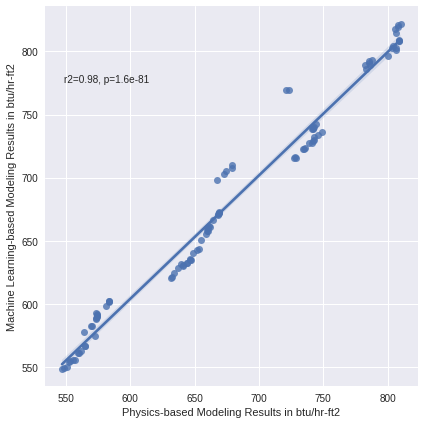

In [ ]:
#Plot
import seaborn as sns
import scipy as sp

#tips = sns.load_dataset('tips')
# g = sns.lmplot(x='Real Values', y='Predicted Values', data=df, row='sex',
#                col='time', height=3, aspect=1)

g = sns.lmplot(x='Physics-based Modeling Results in btu/hr-ft2', y='Machine Learning-based Modeling Results in btu/hr-ft2', data=WriteData, height=6, aspect=1)

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['Physics-based Modeling Results in btu/hr-ft2'], data['Machine Learning-based Modeling Results in btu/hr-ft2'])
    ax = plt.gca()
    ax.text(.05, .8, 'r2={:.2f}, p={:.2g}'.format(R_square, p),
            transform=ax.transAxes)
    
g.map_dataframe(annotate)
plt.show()

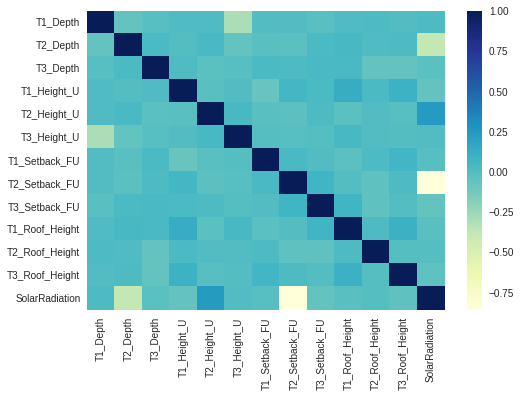

In [ ]:
#Visualise the data
plt.figure()
# sns.heatmap(df.corr(), cmap='coolwarm')
# plt.show()
# plot using a color palette
sns.heatmap(df.corr(), cmap="YlGnBu")
plt.show()
# sns.heatmap(df.corr(), cmap="Blues")
# plt.show()
# sns.heatmap(df.corr(), cmap="BuPu")
# plt.show()
# sns.heatmap(df.corr(), cmap="Greens")
# plt.show()


# 5/10 fold cross validation (k-fold)
## Cross-validation is usually used in machine learning for improving model prediction (c and epsion)
### We can do a grid search of hyperparameters (with 5-fold cross-validation) to see if the test/validation score be improved

Evaluating a Machine Learning model can be quite tricky. Usually, we split the data set into training and testing sets and use the training set to train the model and testing set to test the model. We then evaluate the model performance based on an error metric to determine the accuracy of the model. This method however, is not very reliable as the accuracy obtained for one test set can be very different to the accuracy obtained for a different test set. K-fold Cross Validation(CV) provides a solution to this problem by dividing the data into folds and ensuring that each fold is used as a testing set at some point. 

K-Fold CV is where a given data set is split into a K number of sections/folds where each fold is used as a testing set at some point. Lets take the scenario of 5-Fold cross validation(K=5). Here, the data set is split into 5 folds. In the first iteration, the first fold is used to test the model and the rest are used to train the model. In the second iteration, 2nd fold is used as the testing set while the rest serve as the training set. This process is repeated until each fold of the 5 folds have been used as the testing set.

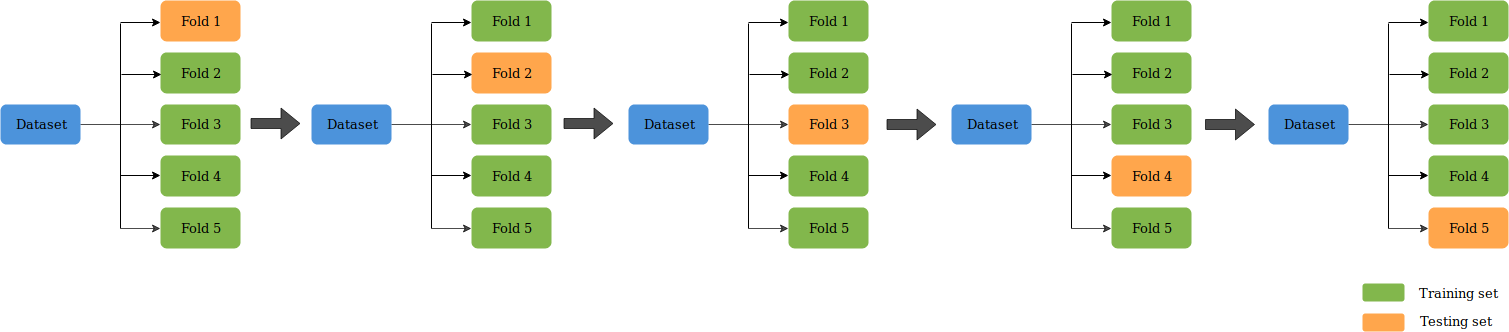

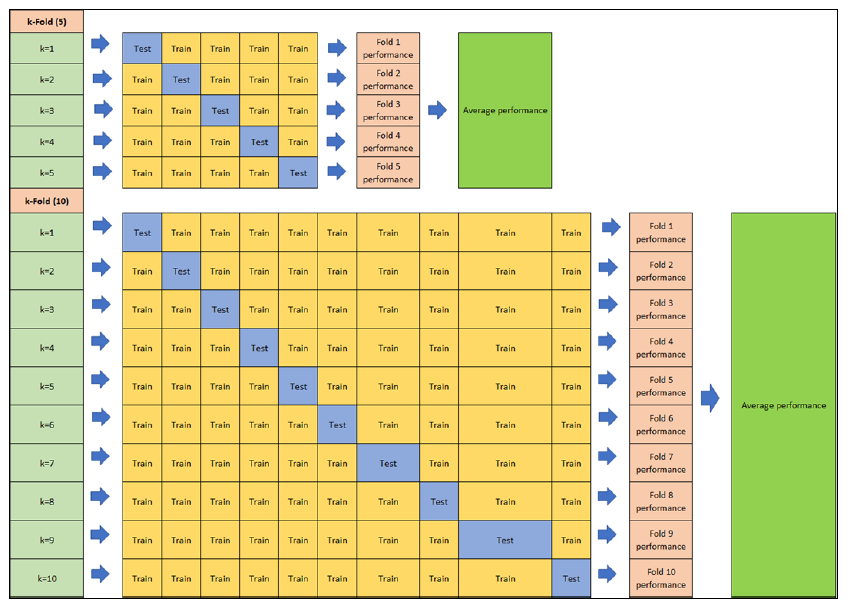

In [ ]:
# https://github.com/amanjayedi/Machine-Learning-with-Python/blob/master/Regression/Support%20Vector%20Regression.ipynb
# https://medium.datadriveninvestor.com/k-fold-cross-validation-6b8518070833
# https://scikit-learn.org/stable/modules/cross_validation.html
# https://www.statology.org/k-fold-cross-validation/

In [ ]:
from sklearn.model_selection import GridSearchCV
params = {'C':[0.01,0.05,0.1,0.5,1,2,5],'epsilon':[0.1,0.2,0.3,0.4,0.5,1]}

In [ ]:
#Selecting the kernel
svr_linear = SVR(kernel='linear')
#Select the folds (c) 
grid = GridSearchCV(svr_linear,param_grid=params,cv=10,scoring='r2',verbose=1,return_train_score=True)
grid.fit(X_train,np.ravel(y_train,order="c"))

Fitting 10 folds for each of 42 candidates, totalling 420 fits


GridSearchCV(cv=10, estimator=SVR(kernel='linear'),
             param_grid={'C': [0.01, 0.05, 0.1, 0.5, 1, 2, 5],
                         'epsilon': [0.1, 0.2, 0.3, 0.4, 0.5, 1]},
             return_train_score=True, scoring='r2', verbose=1)

In [ ]:
# Check which was deemed best estimator by the grid search
grid.best_estimator_

SVR(C=0.1, epsilon=1, kernel='linear')

In [ ]:
#Fit that estimator to the data
svr_best=SVR(kernel='linear',gamma='scale', C=0.1, epsilon=1)
svr_best.fit(X_train,np.ravel(y_train,order="c"))

SVR(C=0.1, epsilon=1, kernel='linear')

In [ ]:
svr_best.score(X_test,y_test)

0.9738834732482482

In [ ]:
from sklearn.metrics import mean_squared_error 
print("RMSE for Linear kernelized SVR:",np.sqrt(mean_squared_error(y_test,svr_best.predict(X_test))))

#R-squared is a relative measure of fit, RMSE is an absolute measure of fit. RMSE is a good measure of how accurately the model predicts the response, and it is the most important criterion for fit if the main purpose of the model is prediction.
#result suggests that the data is bad fit. RMSE is too high
#Try to play with other input variables (adding variables is the main problem?), and compare your RMSE values. The smaller the RMSE value, the better the model.

RMSE for Linear kernelized SVR: 13.67697934720535


# Final Prediction
### Use the random state, c and epsilon got from K-fold to improve the prediction result

In [ ]:
# y_train = y_train.values.astype(float)
# y_train = y_train.reshape(-1,1)

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X_train)
y = sc_y.fit_transform(y_train)

In [ ]:
from sklearn.svm import SVR
#automatically selecting c and epsilon
svr_linear = SVR(kernel='linear',gamma='scale', C=.1, epsilon=1)
#svr_linear.fit(X_train, y_train) 
svr_linear.fit(X_train,np.ravel(y_train,order="c"))

SVR(C=0.1, epsilon=1, kernel='linear')

### ML-based prediction model: Experiment with the real data

In [ ]:
svr_linear = SVR(kernel='linear',gamma='scale', C=.1, epsilon=1)
svr_linear.fit(X_train,np.ravel(y_train,order="c"))

filename = "/content/drive/MyDrive/_MIZZOU/_Resources_KIM+AMAN/DEV/2023_DigitalTwin/SVM_model.joblib"
joblib.dump(svr_linear, filename)

['/content/drive/MyDrive/_MIZZOU/_Resources_KIM+AMAN/DEV/2023_DigitalTwin/SVM_model.joblib']

In [ ]:
prediction_model = joblib.load(filename)

In [ ]:
prediction_model

SVR(C=0.1, epsilon=1, kernel='linear')

In [ ]:
#rerun the prediction after getting the new c and epsilon values
y_pred = prediction_model.predict(X_test)
#WriteData = pd.DataFrame({'Physics-based Modeling Results in btu/hr-ft2':y_test, 'Machine Learning-based Modeling Results in btu/hr-ft2':y_pred})
#print(WriteData)

In [ ]:
X_test

,T1_Depth,T2_Depth,T3_Depth,T1_Height_U,T2_Height_U,T3_Height_U,T1_Setback_FU,T2_Setback_FU,T3_Setback_FU,T1_Roof_Height,T2_Roof_Height,T3_Roof_Height
103,70,60,60,24,48,12,5,5,10,9,9,9
219,70,60,50,24,12,12,5,10,10,12,9,12
422,60,70,50,48,12,36,10,10,10,12,12,12
111,70,60,60,48,48,12,10,10,5,9,9,12
373,70,70,50,24,48,24,5,10,5,9,12,12
...,...,...,...,...,...,...,...,...,...,...,...,...
471,70,70,60,48,24,12,5,10,10,12,12,9
21,70,60,60,48,24,24,10,5,10,12,12,9
484,60,70,60,12,12,12,10,10,5,12,12,9
109,70,70,50,24,48,24,5,10,10,12,9,12


In [ ]:
y_pred

array([814.44161912, 634.50551624, 549.67662494, 675.28684455,
       590.43402451, 678.70274598, 700.7900118 , 728.88888057,
       640.06570122, 687.49747173, 673.6000612 , 810.35536218,
       732.00506899, 725.38429091, 789.29012556, 634.1722921 ,
       660.9761909 , 644.38201009, 721.10592143, 552.43960823,
       564.20669548, 731.25044769, 604.40784917, 796.8439976 ,
       647.99275654, 660.05792256, 552.51491111, 729.16283507,
       710.66120339, 647.99233298, 666.7548705 , 630.0164581 ,
       813.87068866, 555.83412456, 715.23976465, 636.34777537,
       605.10940439, 664.69575347, 763.70863674, 719.61124851,
       638.56981725, 641.682821  , 675.59007965, 783.82541787,
       629.52598676, 806.49712397, 667.43903738, 809.32949089,
       594.39211133, 583.74084616, 725.32280314, 672.62829863,
       657.96486874, 635.63861269, 718.01867656, 591.6301951 ,
       594.82019294, 656.87525313, 562.37897613, 576.66339   ,
       590.15838466, 802.72802361, 801.62684944, 578.32

In [ ]:
DataForPrediction = pd.read_csv("/content/drive/MyDrive/_MIZZOU/_Resources_KIM+AMAN/DEV/2023_DigitalTwin/PredictionModelData.csv")

In [ ]:
DataForPrediction 

,T1_Depth,T2_Depth,T3_Depth,T1_Height_U,T2_Height_U,T3_Height_U,T1_Setback_FU,T2_Setback_FU,T3_Setback_FU,T1_Roof_Height,T2_Roof_Height,T3_Roof_Height
0,70,70,50,24,48,12,5,10,5,9,9,12


In [ ]:
y_pred = prediction_model.predict(DataForPrediction)

In [ ]:
y_pred

array([598.8294579])

In [ ]:


mae=metrics.mean_absolute_error(y_test, y_pred)
mse=metrics.mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
R_square = metrics.r2_score(y_test, y_pred)
# Printing the metrics
print('R2 square:',R_square)
print('MAE: ', mae)
print('MSE: ', mse)
print('RMSE: ', rmse)

R2 square: 0.9738834732482482
MAE:  10.698025747918415
MSE:  187.05976406388166
RMSE:  13.67697934720535


SOLVED!

# Saving ML-based Prediction Model

### Try option 01
https://www.projectpro.io/recipes/save-trained-model-in-python

In [ ]:
! pip install joblib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Step 1 - Import the library
from sklearn import model_selection, datasets
from sklearn.tree import DecisionTreeClassifier
#from sklearn.externals import joblib
# import sklearn.external.joblib as extjoblib
import joblib
import pickle

In [ ]:
dataset = datasets.load_wine()
X = dataset.data; y = dataset.target
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.3)

In [ ]:
model = DecisionTreeClassifier()
model.fit(X_train, y_train)

filename = "/content/drive/MyDrive/_MIZZOU/_Resources_KIM+AMAN/DEV/CAADRIA 2023_SVM/Completed_model.joblib"
joblib.dump(model, filename)

['/content/drive/MyDrive/_MIZZOU/_Resources_KIM+AMAN/DEV/CAADRIA 2023_SVM/Completed_model.joblib']

In [ ]:
!ls

Completed_model.joblib	drive  sample_data


In [ ]:
loaded_model = joblib.load(filename)
result = loaded_model.score(X_test, y_test)
print(result)

0.8888888888888888


### now try with the existing data

# Comparison Plot for validation

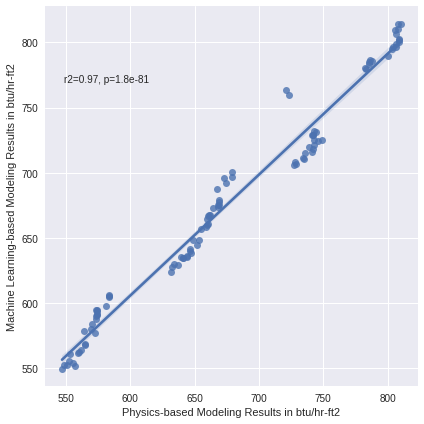

In [ ]:
#Plot
import seaborn as sns
import scipy as sp

#tips = sns.load_dataset('tips')
# g = sns.lmplot(x='Real Values', y='Predicted Values', data=df, row='sex',
#                col='time', height=3, aspect=1)

g = sns.lmplot(x='Physics-based Modeling Results in btu/hr-ft2', y='Machine Learning-based Modeling Results in btu/hr-ft2', data=WriteData, height=6, aspect=1)

def annotate(data, **kws):
    r, p = sp.stats.pearsonr(data['Physics-based Modeling Results in btu/hr-ft2'], data['Machine Learning-based Modeling Results in btu/hr-ft2'])
    ax = plt.gca()
    ax.text(.05, .8, 'r2={:.2f}, p={:.2g}'.format(R_square, p),
            transform=ax.transAxes)
    
g.map_dataframe(annotate)
plt.show()

# Write the data into csv file

In [ ]:
#export the data in csv
WriteData.to_csv('/content/drive/MyDrive/_MIZZOU/_Resources_KIM+AMAN/DEV/CAADRIA 2022_Paper1/Experiment/FinalScripts_SVM/NewScript2022/PredictionResult_OverlandP04.csv', encoding='utf-8')